In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
#importation des données
donnees = pd.read_csv('Advertising.csv', index_col=0)
donnees.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
donnees.shape

(200, 4)

In [4]:
#ATTENTION il y a un bug dans patsy 4.0, il faut le mettre à jour avec un pip install
#commençons par une régression simple
import statsmodels.formula.api as smf

# on crée un modèle pour mettre en relation la pub TV et les ventes
modele = smf.ols(formula='Sales ~ TV', data=donnees).fit()

# on affiche les coefficients
modele.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [5]:
#on veut prédire de nouvelles valeurs pour l'investissement TV
#on crée un DataFrame :
X_pred=pd.DataFrame({'TV':[50,60,80]})
X_pred

,TV
0,50
1,60
2,80


In [6]:
#on affiche les valeurs prédites
modele.predict(X_pred)

array([  9.40942557,   9.88479198,  10.83552478])

In [8]:
#on peut aussi obtenir les intervalles de confiance et les p-values pour les coefficients
modele.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [14]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [12]:
modele.rsquared

0.61187505085007099

In [15]:
#régression multiple

modele2 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

modele2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 06 Dec 2015   Prob (F-statistic):           1.58e-96
Time:                        15:53:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#on effectue la même analyse avec scikit-learn

#on redéfinit les entrées avec des arrays
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

In [17]:
#on utilise la fonction Linear_model de Scikit-learn
from sklearn.linear_model import LinearRegression
modele3 = LinearRegression()
modele3.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
#on affiche les sorties simples
print modele3.intercept_
print modele3.coef_
print modele3.score(X, y)

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]
0.897210638179


In [21]:
#on peut prédire de nouvelles obs
modele3.predict([100, 25, 25])

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 12.20266701])

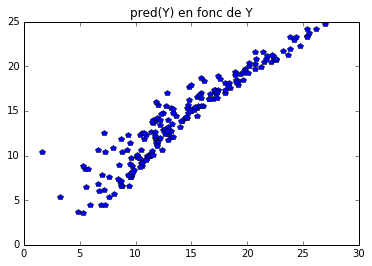

In [26]:
#on peut représenter Y en fonction de pred(y)
plt.plot(y,modele3.predict(X),"p")
plt.title("pred(Y) en fonc de Y")

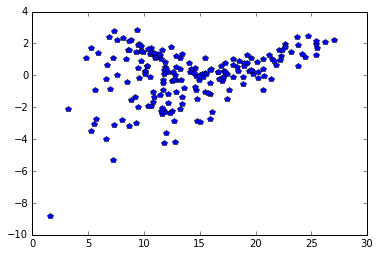

In [29]:
#et les résidus de Y par rapport à Y
plt.plot(y, y-modele3.predict(X), "p")